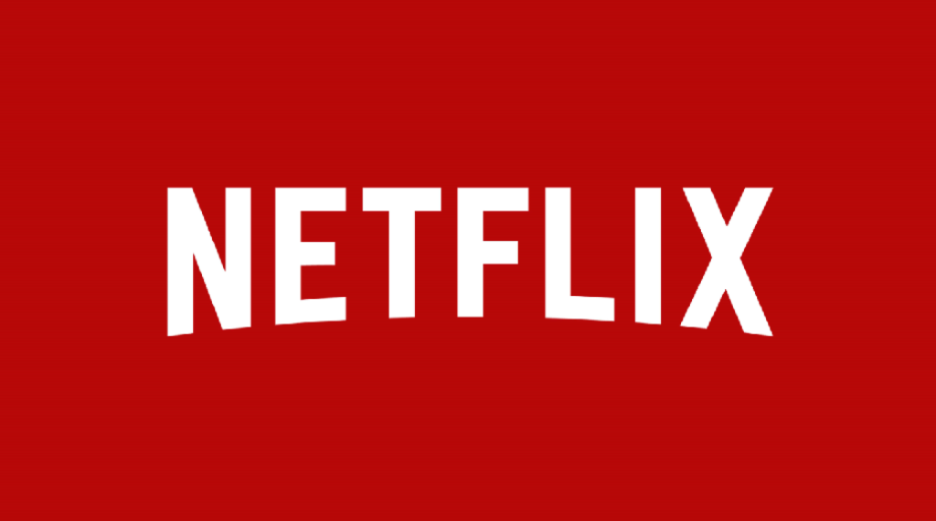

# About this Dataset:
 - Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

 ***Netflix is a rapidly expanding application that continues to gain momentum and a massive user base due to its extensive array of shows and content. This presentation entails an exploratory data analysis (EDA) and narrative using data, providing insights into the platform's growth and offerings. Moreover, it incorporates various graphs and visuals to elucidate patterns and trends, contributing to a comprehensive understanding of Netflix's trajectory and popularity.***

 ****If you found this notebook intriguing, give it a thumbs up! Share your thoughts and suggestions in the comments to make it even better. Your engagement matters! 😀👍****

In [1]:
#Important Library in this project
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Netflix Detaset
Netflix = pd.read_csv('netflix_titles.csv.zip')

In [3]:
# Shadow of csv file
df = Netflix.copy()

In [4]:
#Data content
styled_df = df.sample(5).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#1A0D0D", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#DB0404")]}
])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7445,s7446,Movie,Merantau,Gareth Evans,"Iko Uwais, Sisca Jessica, Christine Hakim, Mads Koudal, Yusuf Aulia, Alex Abbad, Yayan Ruhian, Laurent Buson, Donny Alamsyah, Ratna Galih",Indonesia,"February 13, 2019",2009,R,112 min,"Action & Adventure, Dramas, International Movies","In this fast-paced Indonesian thriller, a young martial arts master travels to Jakarta, where he saves an orphan from a human-trafficking ring."
1643,s1644,Movie,The Call,Lee Chung-hyun,"Park Shin-hye, Jun Jong-seo, Kim Sung-ryoung, EL, Park Ho-san, Oh Jung-se, Lee Dong-hwi, Um Chae-young",South Korea,"November 27, 2020",2020,TV-MA,112 min,"International Movies, Thrillers","Connected by phone in the same home but 20 years apart, a serial killer puts another woman’s past — and life — on the line to change her own fate."
4099,s4100,Movie,Behind the Curve,Daniel J. Clark,nan,United States,"February 15, 2019",2018,TV-14,96 min,Documentaries,"Meet the growing, worldwide community of theorists who defend the belief that the Earth is flat while living in a society who vehemently rejects it."
5344,s5345,Movie,Message from the King,Fabrice Du Welz,"Chadwick Boseman, Luke Evans, Teresa Palmer, Alfred Molina, Natalie Martinez, Tom Felton, Dale Dickey, Sibongile Mlambo","United Kingdom, France, Belgium, United States","August 4, 2017",2017,R,103 min,"Independent Movies, Thrillers","On a relentless quest to avenge his sister's murder, a man from Cape Town infiltrates a sprawling network of lowlifes and elites in Los Angeles."
4548,s4549,Movie,Monty Python: The Meaning of Live,"Roger Graef, James Rogan","John Cleese, Terry Gilliam, Eric Idle, Terry Jones, Michael Palin, Mike Myers, Graham Chapman, Stephen Hawking",United Kingdom,"October 2, 2018",2014,TV-MA,94 min,Documentaries,"From heyday to curtain call, this documentary offers a rare glimpse of the legendary Monty Python troupe as it stages live shows after a long hiatus."


There is 12 column for performing EDA

In [5]:
styled_df = df.describe().style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#1A0D0D", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#DB0404")]}
])

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
# missing Value
for i in df.columns:
  nan_col = df[i].isna().sum() / len(df) * 100
  if nan_col > 0:
    print("{} nan_col {}%" .format(i,round(nan_col,2)))

director nan_col 29.91%
cast nan_col 9.37%
country nan_col 9.44%
date_added nan_col 0.11%
rating nan_col 0.05%
duration nan_col 0.03%


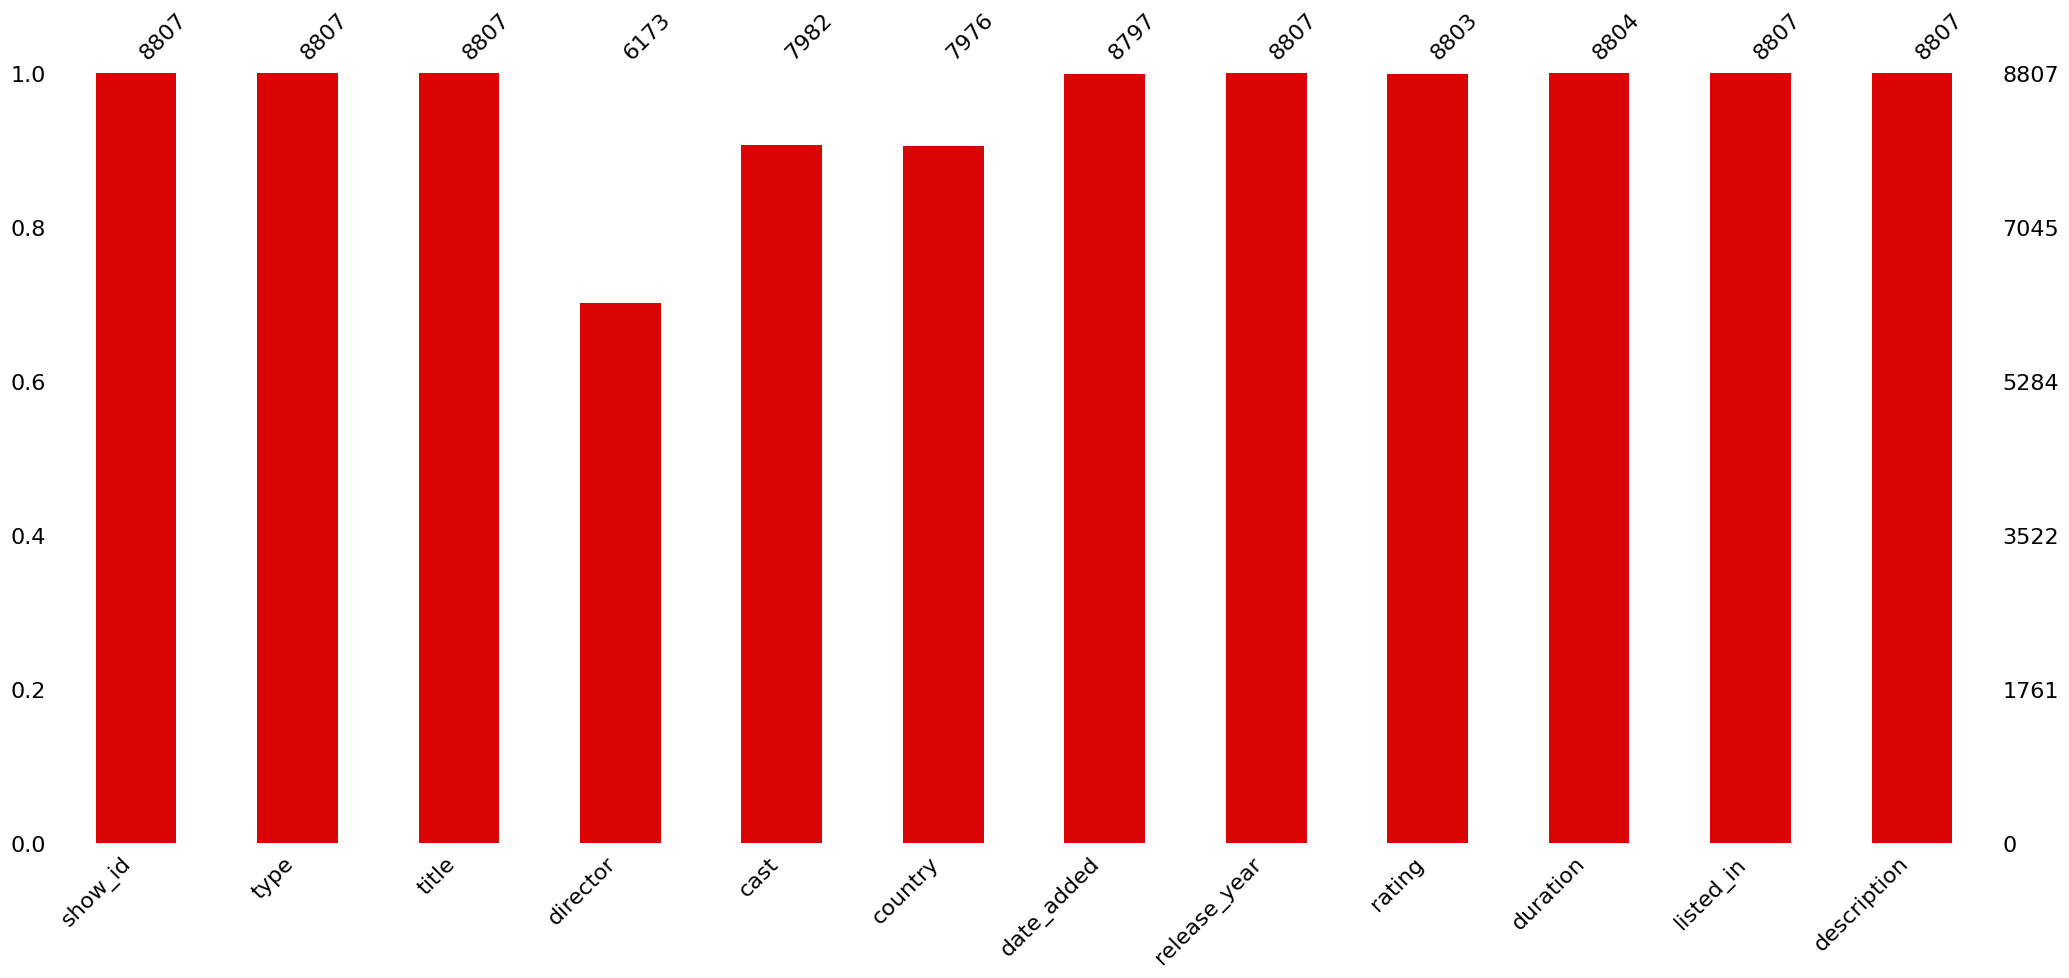

In [7]:
# Highlighting the number of missing value in bar chart
msno.bar(df, color='#DB0404')
plt.show()

***📊✨ Peek at Missing Data: Counting the Blanks! 🕳️📉***

*This bar chart reveals how many bits of information are missing in each category. **"Director"** leads with the most gaps, followed by **"cast"** and **"country."** , **"Date_added"** and **"rating"** have only a few missing pieces.🚀🔍🌟*

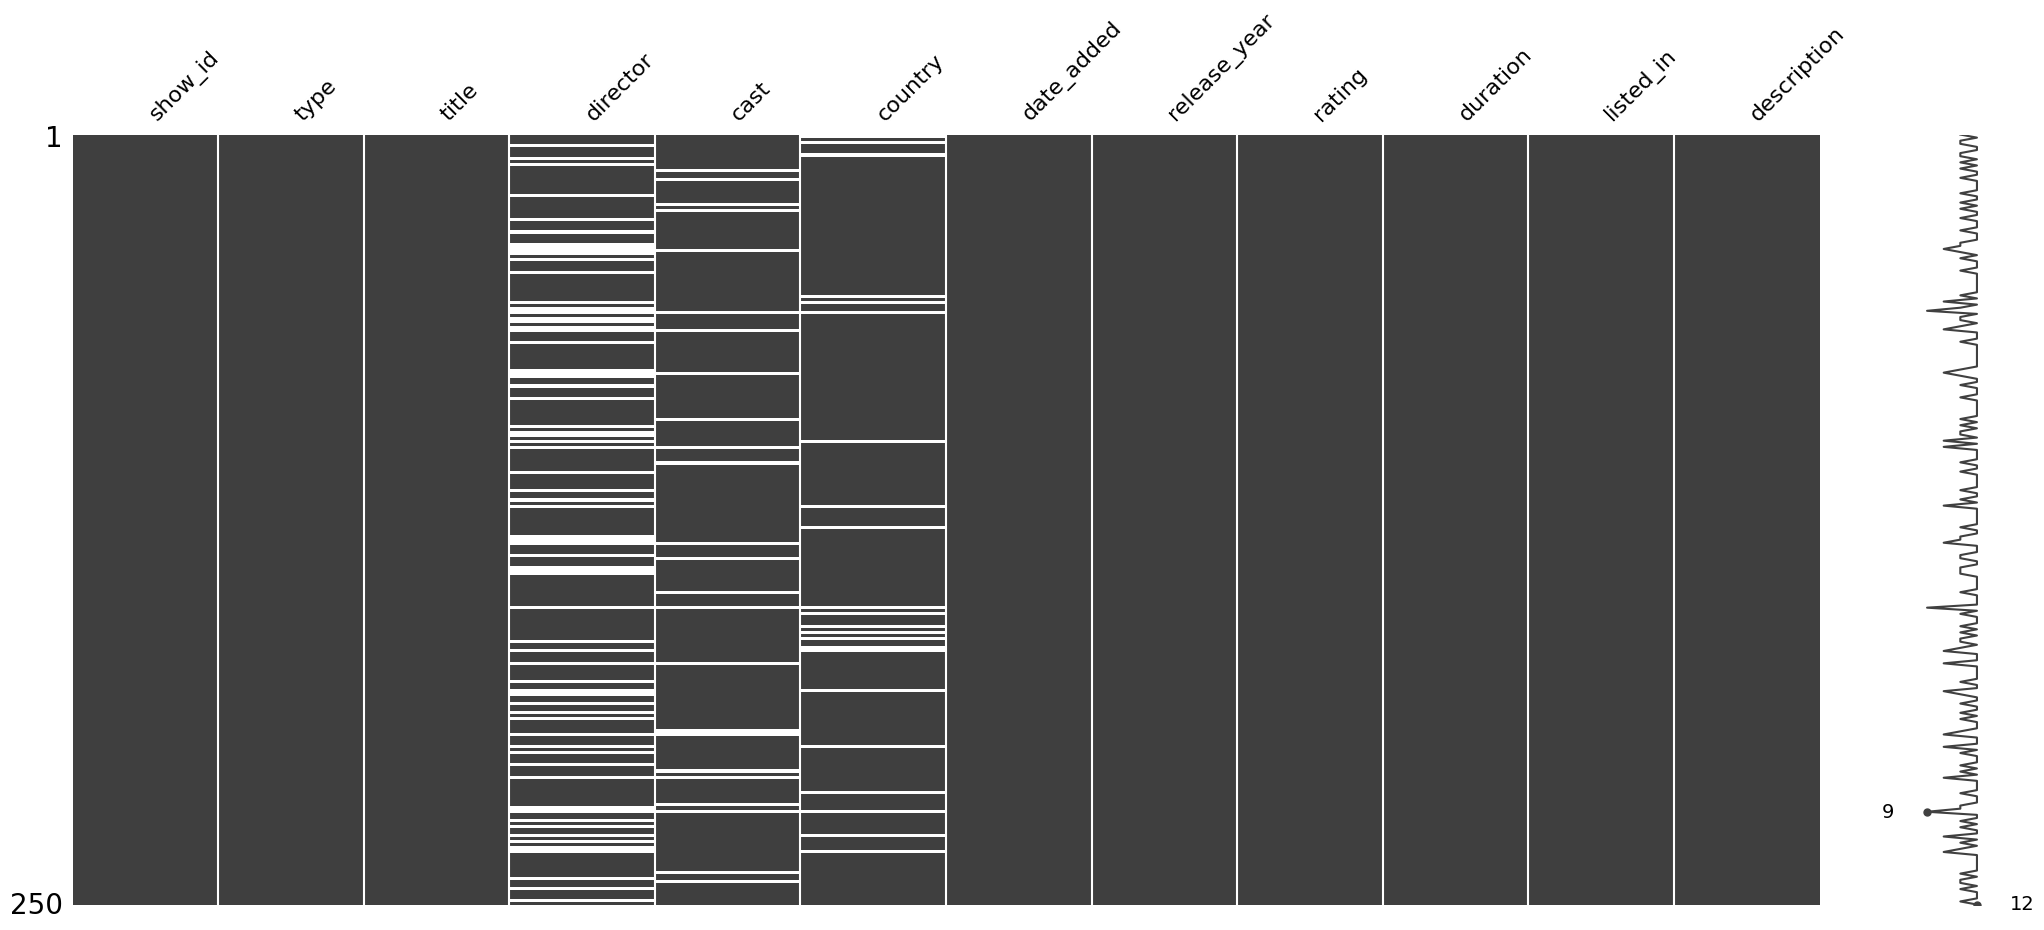

In [8]:
# highlighting the missing value in matrix chart
msno.matrix(df.sample(250))
plt.show()

***🔍✨ Unveiling Patterns: Decode the Missing Puzzle Pieces! 🧩🎭***

*Using this matrix, unravel missing data patterns swiftly. The visual spectacle above unveils intriguing insights: the **"director"** field showcases a distinctive, eye-catching pattern. In contrast, both **"cast"** and **"country"** boast a similar intriguing pattern of absent values. Meanwhile, the **"date_added"** column paints a unique picture of its own. Stay tuned for more hidden discoveries! 🕵️‍♂️🎥🌟*

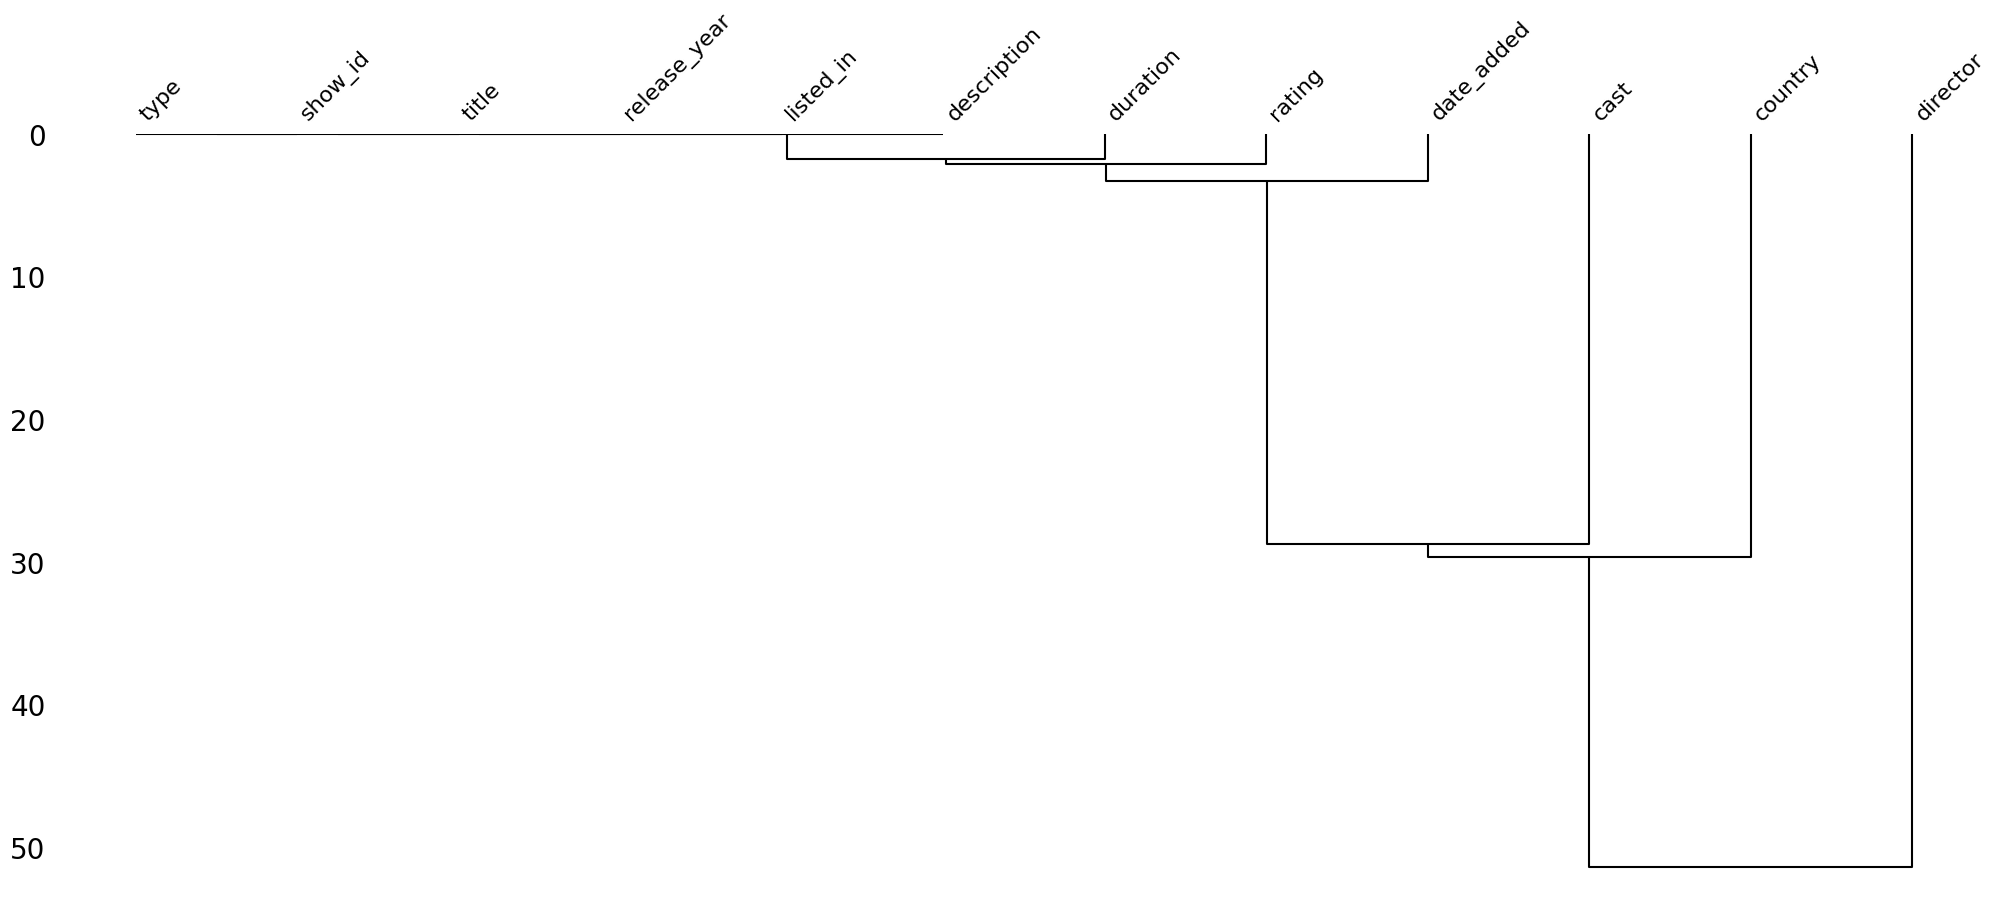

In [9]:
# Highlighting the missing value in dendrogram chart
msno.dendrogram(df)
plt.show()

***🌿📊 Dendrogram Insight: Exploring Missing Info! 🕳️🌌***

*This chart reveals the extent of missing information in each category. **"Director"** leads with the most gaps, followed by **"Cast"** and **"Country."** In contrast, **"Date_added"** and **"Rating"** have minimal missing data. Let's dive deeper into this data landscape! 🚀🔍🌟*

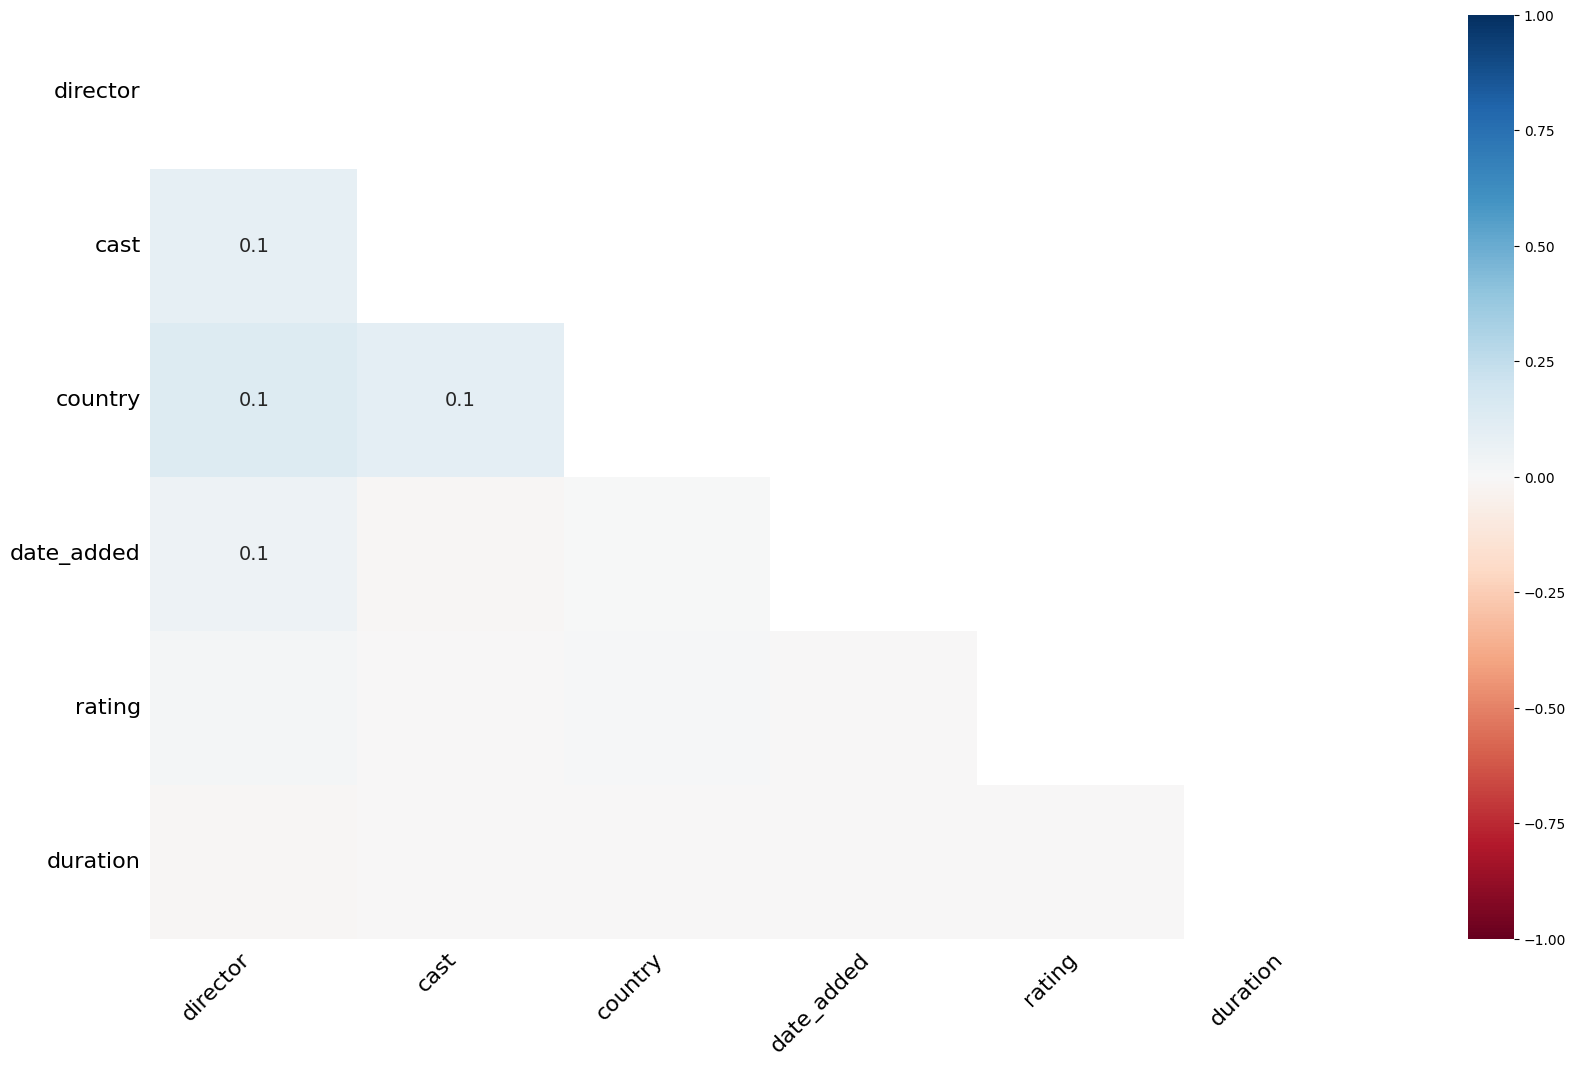

In [10]:
# 🔥 Visualize the correlation of missing values across columns with a heatmap! 📊
msno.heatmap(df)
plt.show()

***🔍🌡️ Exploring Heatmap Correlation: A Peek into Missing Value Dynamics!***

**In this heatmap, the closeness to zero indicates independence in the occurrence of missing values between two variables. The closer to zero, the weaker the correlation in their missingness. 📊🧩**

In [11]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [12]:
# series
net_shows = df[df['type']== 'TV Show']

In [13]:
# movies
net_movies = df[df['type'] == 'Movie']

# ***Visualization***

In [14]:
plt.style.use('fast')

In [15]:
no_tv_movie = df['type'].value_counts().sort_values()
# Pie chart for type columns
import plotly.graph_objects as go
label = ["TV-Shows",
         "Movies"]
colors = ['#1A0D0D','#DB0404']
fig = go.Figure(data=[go.Pie(values=no_tv_movie, labels=label,  hole=.06)])
fig.update_layout(title_text='Type of Netflix Content')
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value',
                  textfont_size=30,
                  marker=dict(colors=colors,
                              line=dict(color='#7B7C7C', width=3)))
fig.show()

**Indeed, it's evident that Netflix offers a larger selection of movies compared to TV shows within its platform.**

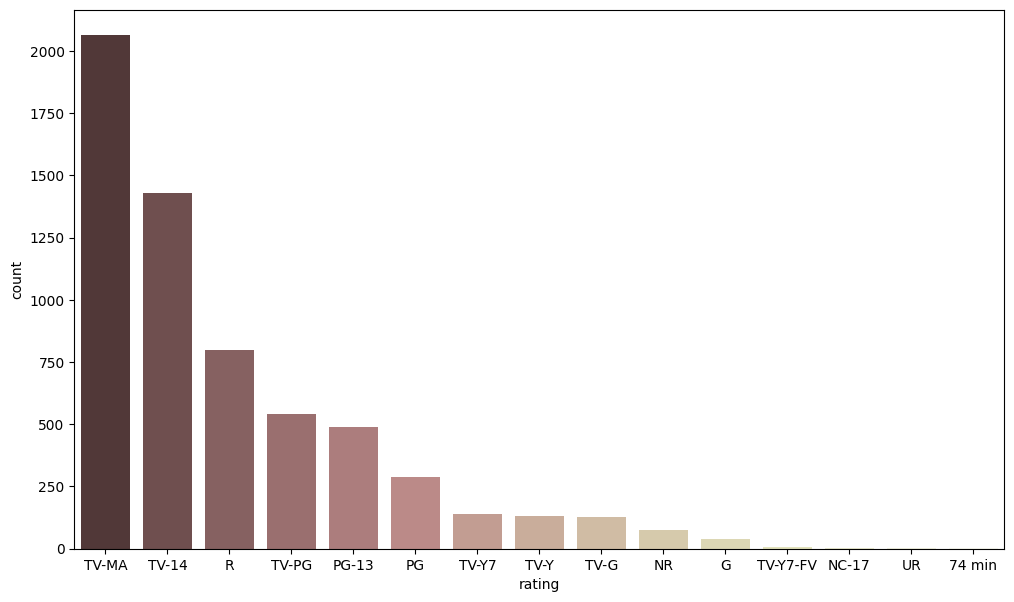

In [16]:
# movies rating anaysis
plt.figure(figsize=(12,7))
sns.countplot(x='rating', data=net_movies, order= net_movies['rating'].value_counts().index[0:15], palette='pink')
plt.show()

***The majority of movies have been assigned the 'TV-MA' rating, intended for mature audiences. Following closely is the 'TV-14' rating, denoting content potentially unsuitable for those under 14. Additionally, the 'R' rating, indicating content unsuitable for those under 17 without adult supervision, is also prevalent.***

**For optimal content visibility, aim to release your production in the month with the lowest influx of new content on the platform! 🌟**

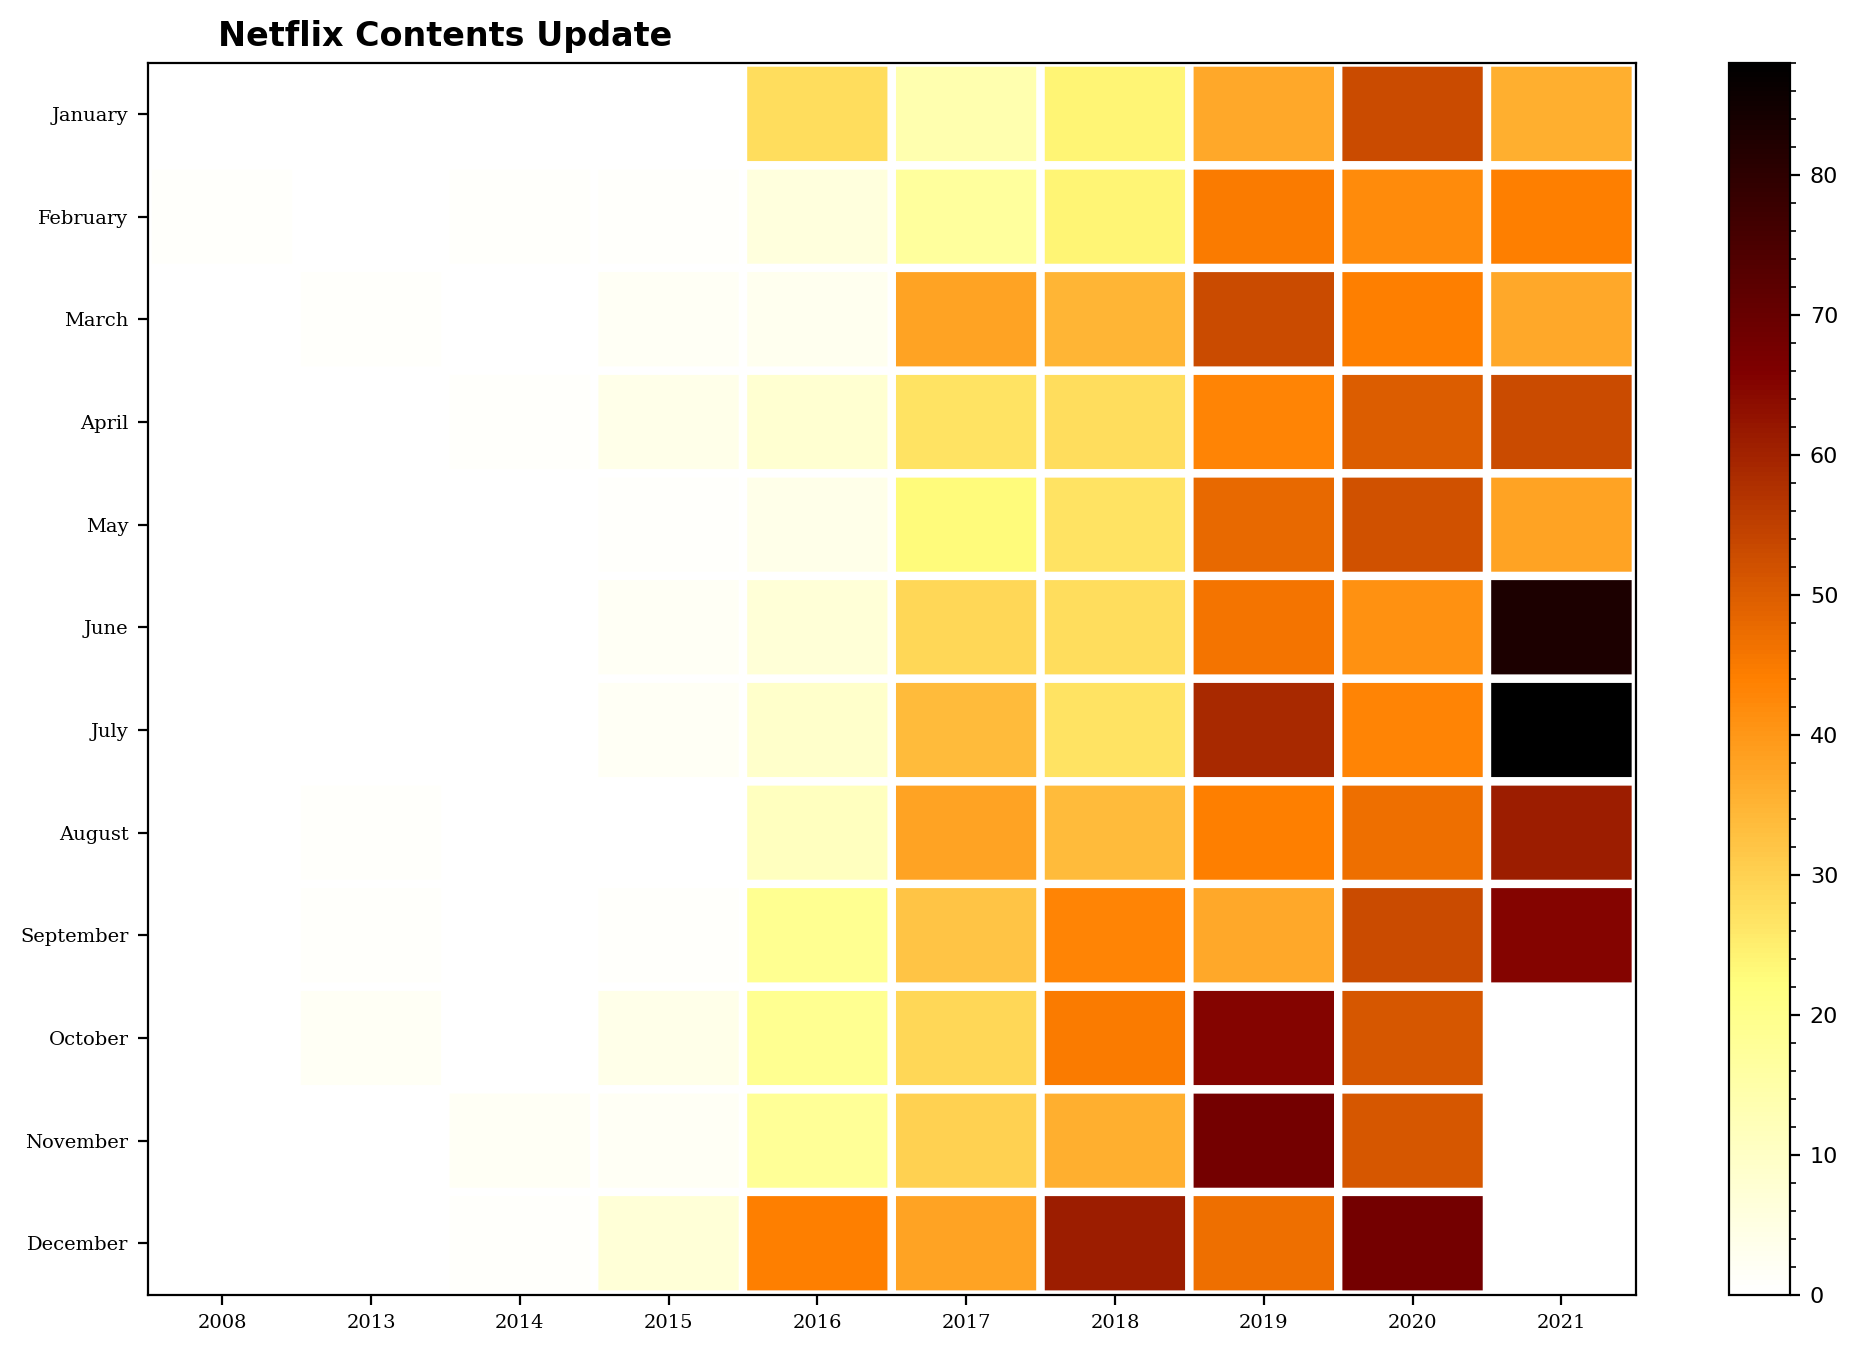

In [17]:
net_date = net_shows[['date_added']].dropna()
net_date['year'] = net_date['date_added'].apply(lambda x: x.split(', ')[-1])
net_date['month'] = net_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March','April','May','June','July','August','September','October','November','December'][::-1]
nf = net_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(12,8), dpi=200)
#heatmap
plt.pcolor(nf, cmap='afmhot_r',edgecolor='white',linewidths=3)
plt.xticks(np.arange(0.5, len(nf.columns),1), nf.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(nf.index),1), nf.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update', fontsize=12, fontweight='bold',position=(0.20,1.0+0.2))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

**In the context of the latest year, 2019, January and December stood out with notably lower content releases. Hence, these months could be strategic choices for a successful new release! 📅✨**

## ***Using IMDB ratings, we can pinpoint the top-rated movies on Netflix. 🎬🌟***

In [18]:
imdb_rating = pd.read_csv('IMDB-Ratings.csv.zip', usecols=['averageRating'])
imdb_title = pd.read_csv('movies.csv', usecols=['title','year','genre'])

In [19]:
ratings = pd.DataFrame({'Title':imdb_title.title,
'Release Year':imdb_title.year, 'Rating':imdb_rating.averageRating, 'Genre':imdb_title.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(9940, 4)

### ***`Let's join the ratings dataset with Netflix content to unveil the gems that boast both IMDb ratings and availability on Netflix! 🌟🔗`***

In [20]:
ratings.dropna()
join_tab = ratings.merge(df, left_on='Title', right_on='title', how='inner')
join_tab = join_tab.sort_values(by='Rating', ascending=False)
# checking after joining
join_tab.sample()

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1557,All the Boys Love Mandy Lane,2006,6.4,"Horror, Mystery, Thriller",s6121,Movie,All the Boys Love Mandy Lane,Jonathan Levine,"Anson Mount, Edwin Hodge, Michael Welch, Brook...",United States,"July 3, 2018",2006,R,91 min,Horror Movies,During a weekend excursion to a secluded ranch...


***Top 10 Movies on Netflix***

In [21]:
import plotly.express as go
top_rated = join_tab[0:10]
fig = go.sunburst(top_rated,path=['title','country'],values='Rating', color='Rating')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

***Unveiling the countries hosting the highest-rated content! 🌍🥇***

In [22]:
top_country = join_tab['country'].value_counts().sort_values(ascending=False)
top_country = pd.DataFrame(top_country)
country_count = top_country[0:11]
country_count

,country
United States,754
India,166
United Kingdom,56
"United Kingdom, United States",54
"United States, Canada",31
"United States, United Kingdom",26
South Korea,22
Canada,18
"United States, Germany",18
Turkey,15


## ***Analyzing by year📊🎥***

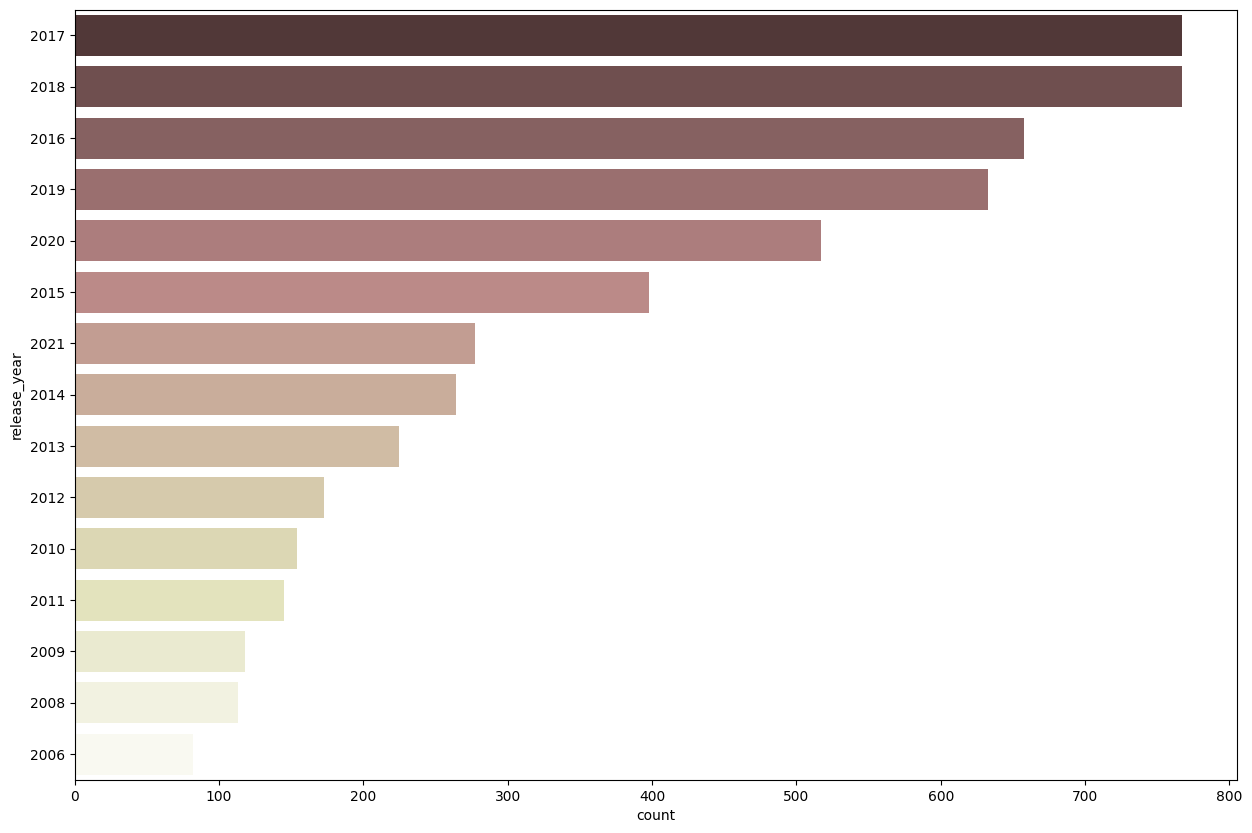

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(data=net_movies, y='release_year',palette='pink', order=net_movies['release_year'].value_counts().index[0:15])
plt.show()

***Absolutely! 2017 marked the year with the highest volume of movie releases. 🎬📆***

In [24]:
countries = {}
net_movies['country'] = net_movies['country'].fillna('Unknown')
xou = list(net_movies['country'])

for i in xou:
  i= list(i.split(','))
  if len(i)==1:
    if i in list(countries.keys()):
      countries[i]+=1
    else:
      countries[i[0]]=1
  else:
    for j in i:
      if j in list(countries.keys()):
        countries[j] +=1
      else:
        countries[j] =1

In [25]:
countries_fin = {}
for country,no in countries.items():
  country = country.replace(' ','')
  if country in list(countries_fin.keys()):
    countries_fin[country] += no
  else:
    countries_fin[country] = no

countries_fin = {k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse=True)}

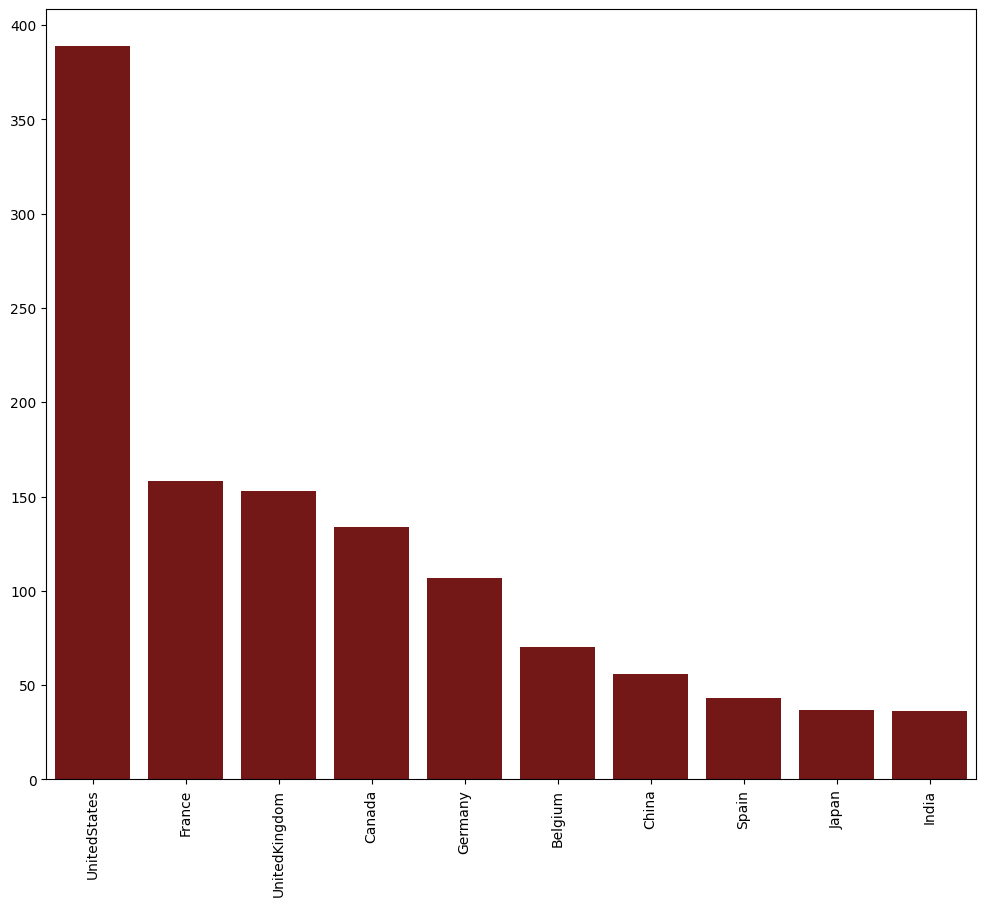

In [26]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10], color='#830908')
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)
plt.show()

***Highlighting the top 10 countries in content creation for movies! 🎬🌟***

## Analyzing Movie duration

In [27]:
net_movies.dropna(axis=0, inplace=True, subset=['duration'])

In [28]:
net_movies['duration']=net_movies['duration'].str.replace(' min','')
#net_movies['duration'] = pd.to_numeric(net_movies['duration'], errors='coerce').astype(pd.Int64Dtype())
net_movies['duration']=net_movies['duration'].astype(str).astype(int)
#net_movies['duration']

In [29]:
net_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6128 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6128 non-null   object
 1   type          6128 non-null   object
 2   title         6128 non-null   object
 3   director      5940 non-null   object
 4   cast          5653 non-null   object
 5   country       6128 non-null   object
 6   date_added    6128 non-null   object
 7   release_year  6128 non-null   int64 
 8   rating        6126 non-null   object
 9   duration      6128 non-null   int64 
 10  listed_in     6128 non-null   object
 11  description   6128 non-null   object
dtypes: int64(2), object(10)
memory usage: 622.4+ KB


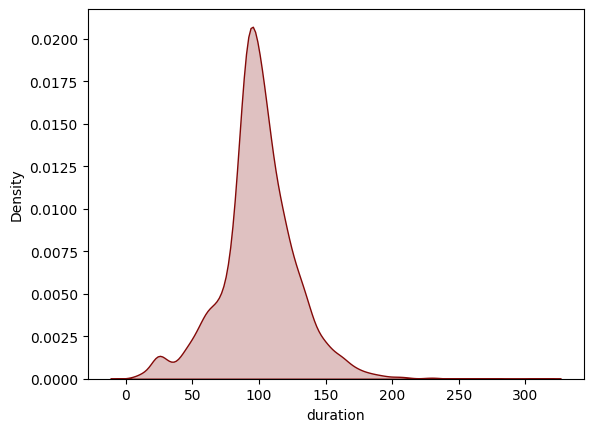

In [30]:
# ploting duration
sns.kdeplot(data=net_movies['duration'], color='#830908', shade=True)
plt.show()

***Many movies on Netflix last between 75 to 120 minutes. This is good because many people prefer shorter movies that can be watched in one go, instead of longer ones that may take over three hours. 🎥⏱️***

In [31]:
from collections import Counter
genres = list(net_movies['listed_in'])
gen = []

for i in genres:
  i = list(i.split(','))
  for j in i:
    gen.append(j.replace(' ',''))
ge = Counter(gen)

## WordClouds for Movies Genres

***A word cloud is a visual made up of words forming a shape resembling clouds. ☁️🔤***

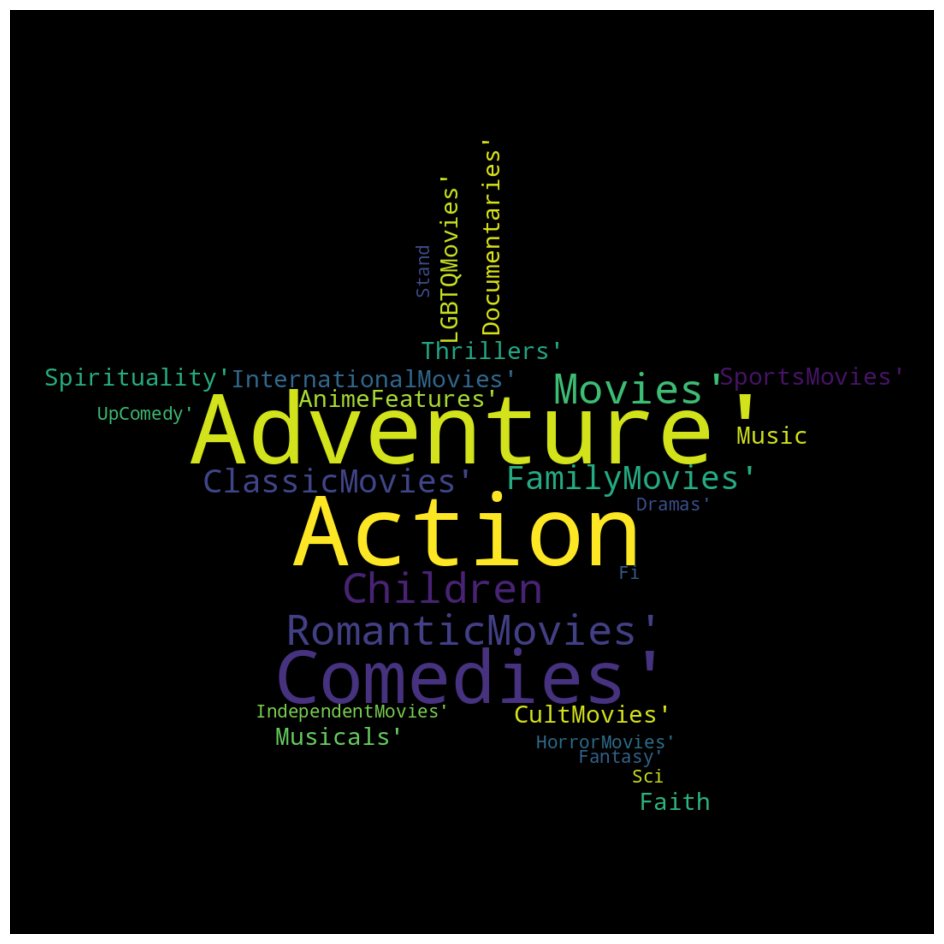

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

txt = list(set(gen))
plt.rcParams['figure.figsize'] = (13,12)
#assigning shape to the word cloud
mask = np.array(Image.open('/content/5pamsvim.png'))
wordcloud = WordCloud(max_words = 1000000, background_color = 'black', mask=mask).generate(str(txt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Visualizing the genre distribution on Netflix! 🍭📊🎬

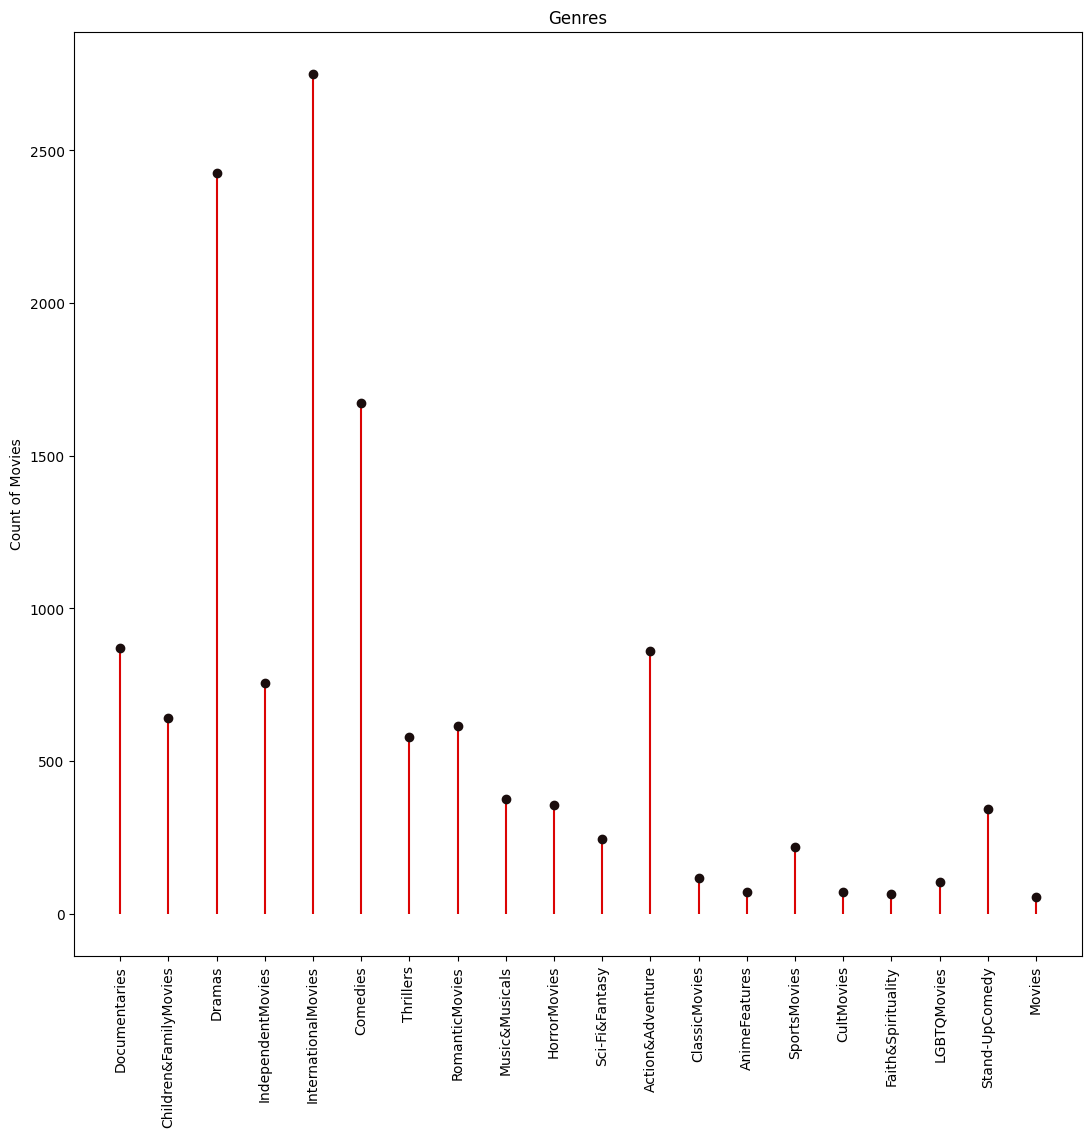

<Figure size 1000x1000 with 0 Axes>

In [33]:
c = {k: v for k, v in sorted(ge.items(), key=lambda item:item[1], reverse=True )}

fig, ax = plt.subplots()
fig = plt.figure(figsize=(10,10))
x = list(ge.keys())
y = list(ge.values())
ax.vlines(x, ymin = 0, ymax = y, color = '#DB0404')
ax.plot(x,y, 'o', color='#1A0D0D')
ax.set_xticklabels(x, rotation=90)
ax.set_ylabel('Count of Movies')
ax.set_title('Genres')
plt.show()

***Certainly! International movies, dramas, and comedies shine as the top three genres with the largest content pool on Netflix. 🌏🎭😄***

## Analyzing TV-Series On Netflix

In [34]:
net_shows.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [35]:
countries1={}
net_shows['country']=net_shows['country'].fillna('Unknown')
cou1=list(net_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

In [36]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no

countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

***Most Content creating countries***

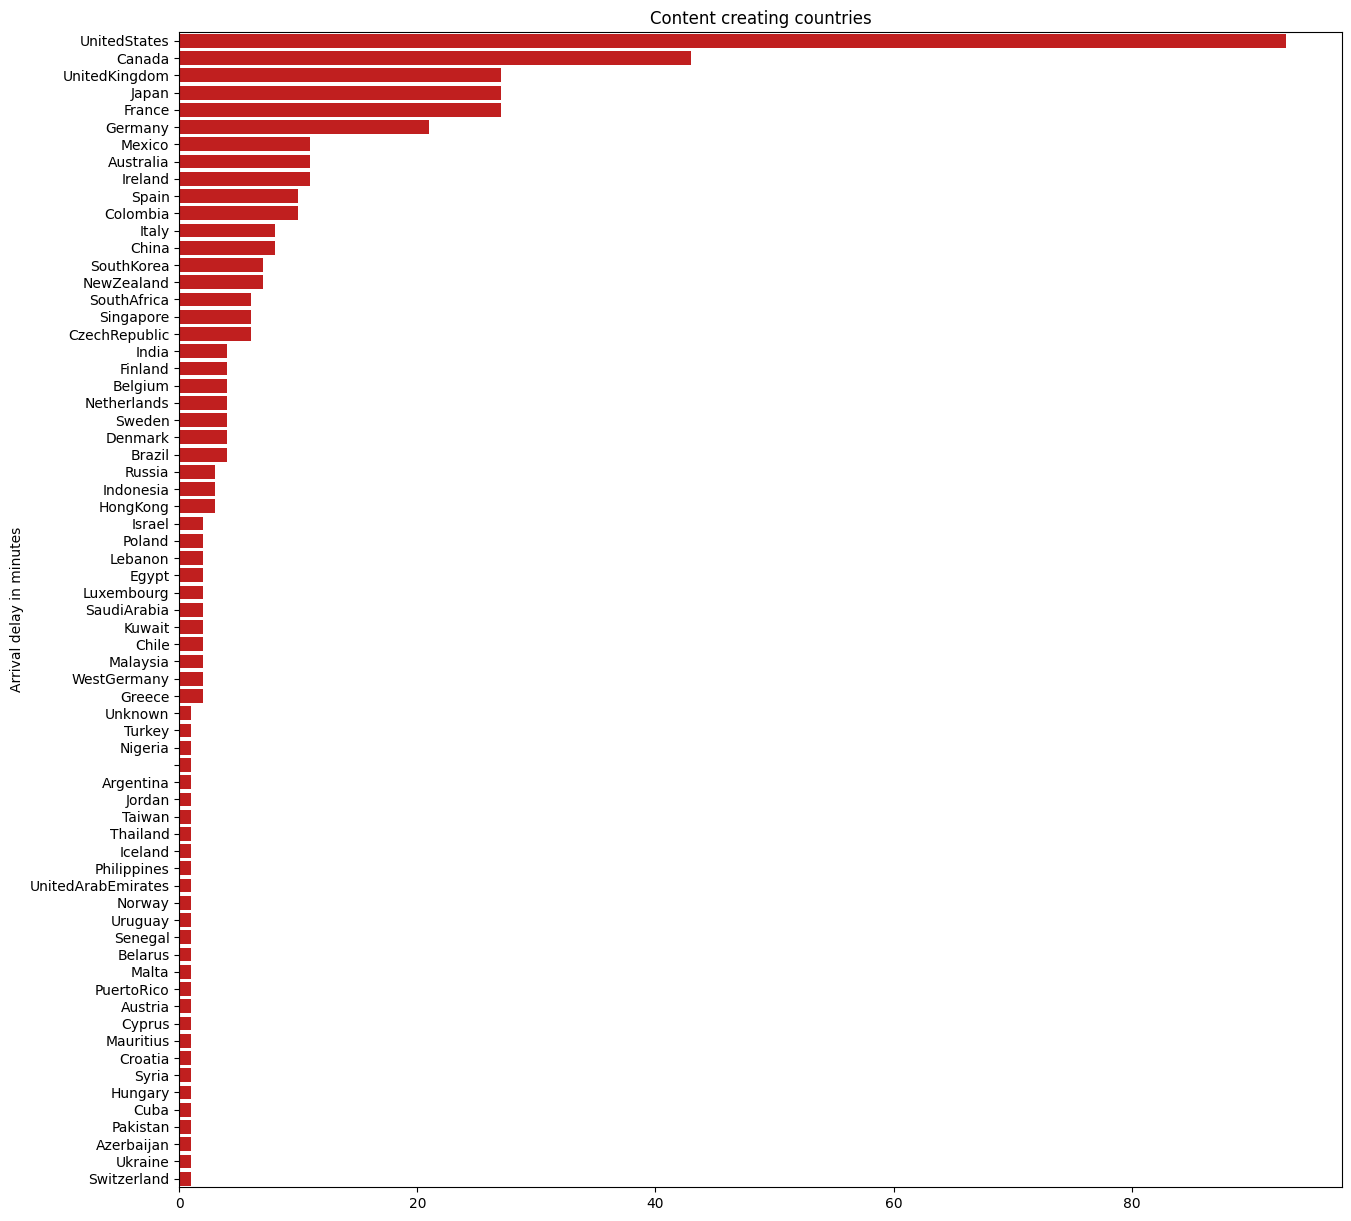

In [37]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()), color='#DB0404')

# Add label for vertical axis
plt.ylabel("Arrival delay in minutes")
plt.show()

***In the Netflix realm of TV series, the United States takes the crown as the reigning champ of content creation! 🇺🇸👑🎬***

In [38]:
feature = ['title','duration']
durations = net_shows[feature]
durations['no_of_seasons'] = durations['duration'].str.replace(' Season','')
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons'] = durations['no_of_seasons'].astype(str).astype(int)

## **Introducing the ultimate binge-watchers! These TV shows have the most seasons. 📺🌟🏆**

In [39]:
n = ['title','no_of_seasons']
top = durations[n]

top=top.sort_values(by='no_of_seasons',ascending=False)

<Figure size 1000x1000 with 0 Axes>

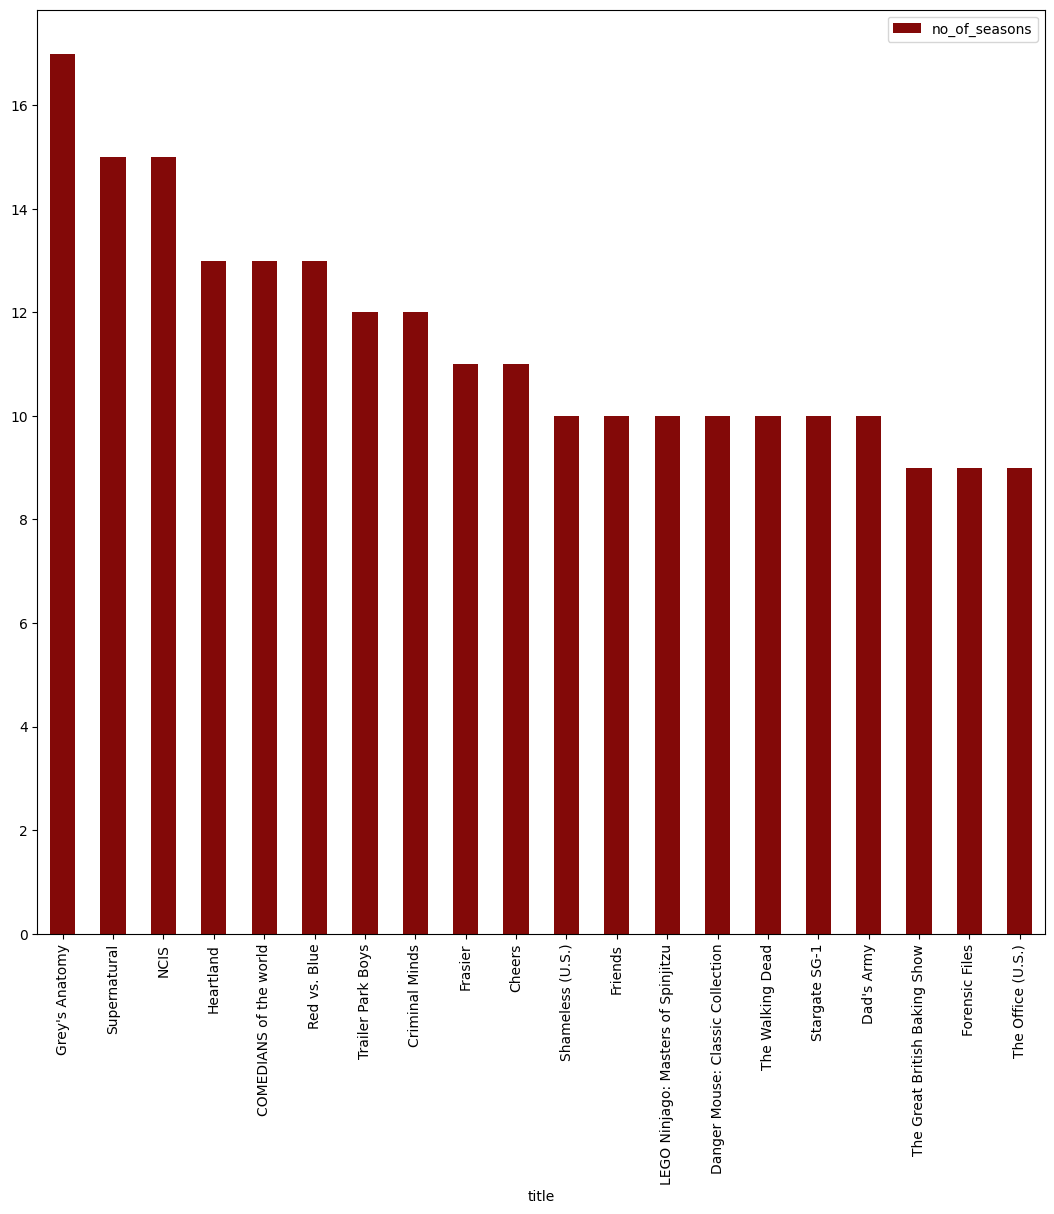

In [40]:
plt.figure(figsize=(10,10))
top20 = top[0:20]
top20.plot(kind='bar', x='title', y='no_of_seasons', color='#830908')
plt.show()

***NCIS, Grey's Anatomy, and Supernatural are TV shows with a bunch of seasons – they've been around for a while! 📺👑✨***

## Minimum numbers of season

In [41]:
bottom = top.sort_values(by='no_of_seasons')
bottom = bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

***Here are some shows perfect for a quick binge! They've got just one season, so you can enjoy them without a long-term commitment. 📺🍿***

## WordClouds for TV-Shows Genres

In [42]:
genres = list(net_shows['listed_in'])
gen = []
for i in genres:
  i=list(i.split(','))
  for j in i:
    gen.append(j.replace(' ',''))

t = Counter(gen)

***A word cloud is a visual made up of words forming a shape resembling clouds. ☁️🔤***

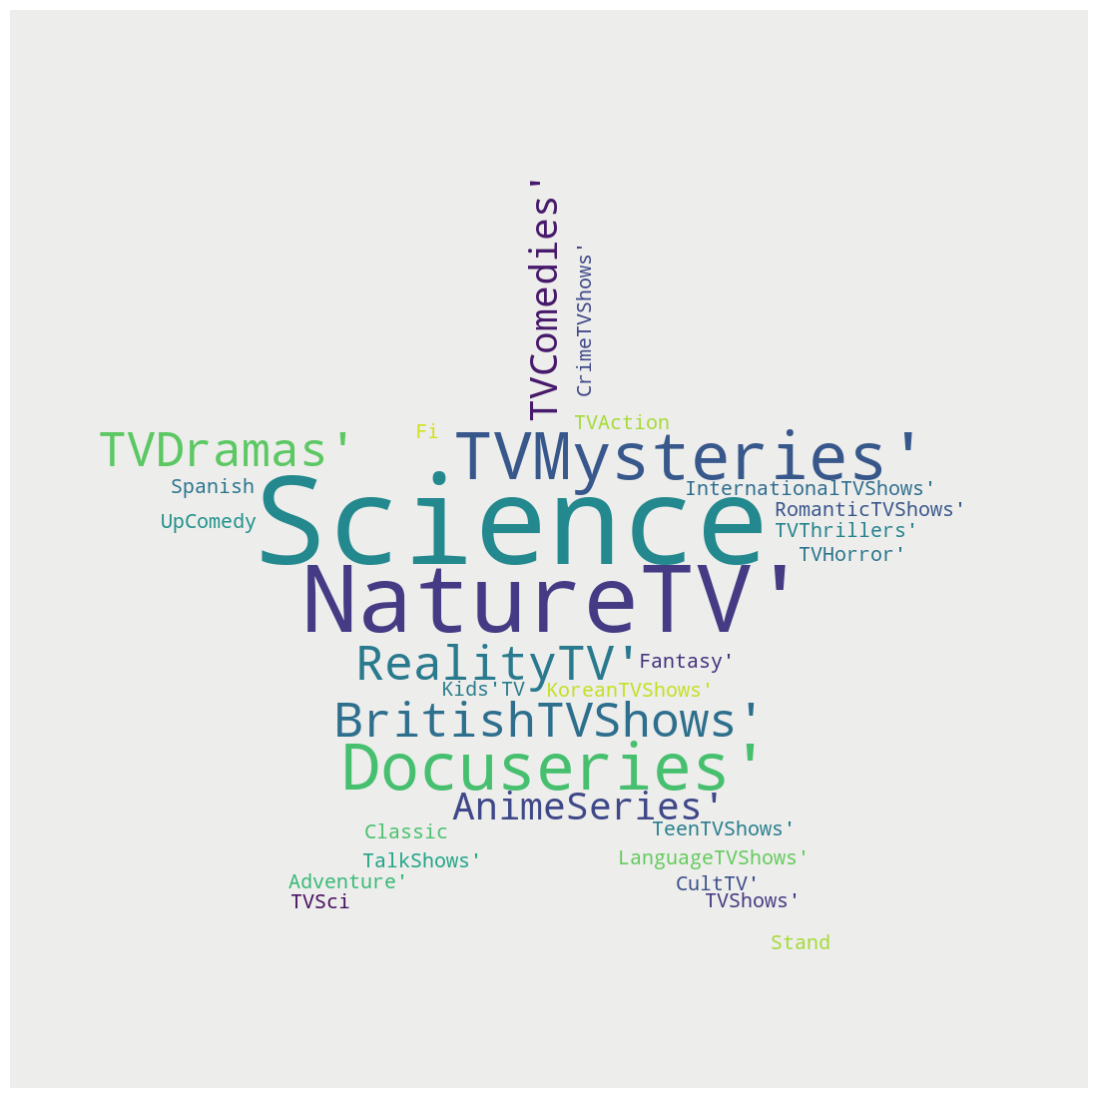

In [43]:
txt = list(set(gen))

mask = np.array(Image.open('/content/5pamsvim.png'))
word_cloud = WordCloud(max_words=1000000, background_color='#EDEDEB', mask=mask).generate(str(txt))
plt.rcParams['figure.figsize'] = (14,14)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
# Oldest US Tv-Series
us_tv_shows = net_shows[net_shows['country']=='United States']
old_tv_shows = us_tv_shows.sort_values(by='release_year')[0:20]

In [45]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'], fill_color='#f057ff'),
                               cells=dict(values=[old_tv_shows['title'],old_tv_shows['release_year']],fill_color='#ffc0bb'))
])
fig.show()

***The table above showcases the oldest US TV shows available on Netflix. 📺🕰️***

In [46]:
# latest Tv-Shows in USA
new_tv_shows = us_tv_shows.sort_values(by='release_year', ascending=False)[0:50]

In [47]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'], fill_color='#ffff02'),
                               cells=dict(values=[new_tv_shows['title'],new_tv_shows['release_year']],fill_color='lavender'))
])
fig.show()

***The table above showcases the latest US TV shows available on Netflix. 📺🕰️***

In [48]:
# Fetching movies director from Spain
netflix_Sp = df[df['country']=='Spain']
net_sp = netflix_Sp.dropna()
import plotly.express as px
plt.figure(figsize=(15,15))
fig = px.treemap(net_sp, path=['country','director'], color='director', hover_data=['director','title'], color_continuous_scale = '#e60123')
fig.show()


<Figure size 1500x1500 with 0 Axes>

***The diverse content from Spain on Netflix, particularly in movies, reflects equal opportunities for various directors to showcase their skills. It's a fair and varied representation. 🇪🇸🎥🌟***

In [49]:
# latest Tv-Shows in Spain
latest_sp_series = netflix_Sp.sort_values(by='release_year', ascending=False)[0:20]
latest_sp_series.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
109,s110,TV Show,La casa de papel,NaN,"Úrsula Corberó, Itziar Ituño, Álvaro Morte, Pa...",Spain,"September 3, 2021",2021,TV-MA,5 Seasons,"Crime TV Shows, International TV Shows, Spanis...",Eight thieves take hostages and lock themselve...
1368,s1369,Movie,Below Zero,Lluís Quílez,"Javier Gutiérrez, Karra Elejalde, Luis Callejo...",Spain,"January 29, 2021",2021,TV-MA,107 min,"Action & Adventure, International Movies","When a prisoner transfer van is attacked, the ..."
1432,s1433,TV Show,The Idhun Chronicles,Maite Ruiz De Austri,"Michelle Jenner, Itzan Escamilla, Sergio Mur, ...",Spain,"January 8, 2021",2021,TV-14,2 Seasons,"Anime Series, International TV Shows, Spanish-...",A boy suddenly orphaned fights his parents' ki...
1315,s1316,Movie,Hate by Dani Rovira,Mario Briongos,Dani Rovira,Spain,"February 12, 2021",2021,TV-MA,83 min,Stand-Up Comedy,"From his hometown of Málaga, Dani Rovira refle..."
1260,s1261,Movie,Crazy About Her,Dani de la Orden,"Álvaro Cervantes, Susana Abaitua, Luis Zahera,...",Spain,"February 26, 2021",2021,TV-MA,107 min,"Comedies, International Movies, Romantic Movies","After spending a wild night together, Adri dis..."


In [50]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title','Release Year'], fill_color='#ff0222'),
                               cells =dict(values=[latest_sp_series['title'], latest_sp_series['release_year']], fill_color='pink'))
])
fig.show()

In [51]:
top_dur = pd.value_counts(df['duration'])
fig = go.Figure([go.Bar(x=top_dur.index, y=top_dur.values, text=top_dur.values, marker_color='#e60123')])
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.show()

***It seems that having a single season is the most popular and preferred duration for these shows. 📺👍***

 > > > ## **What Netflix looked like when it first started out - and how it's changed over the years**

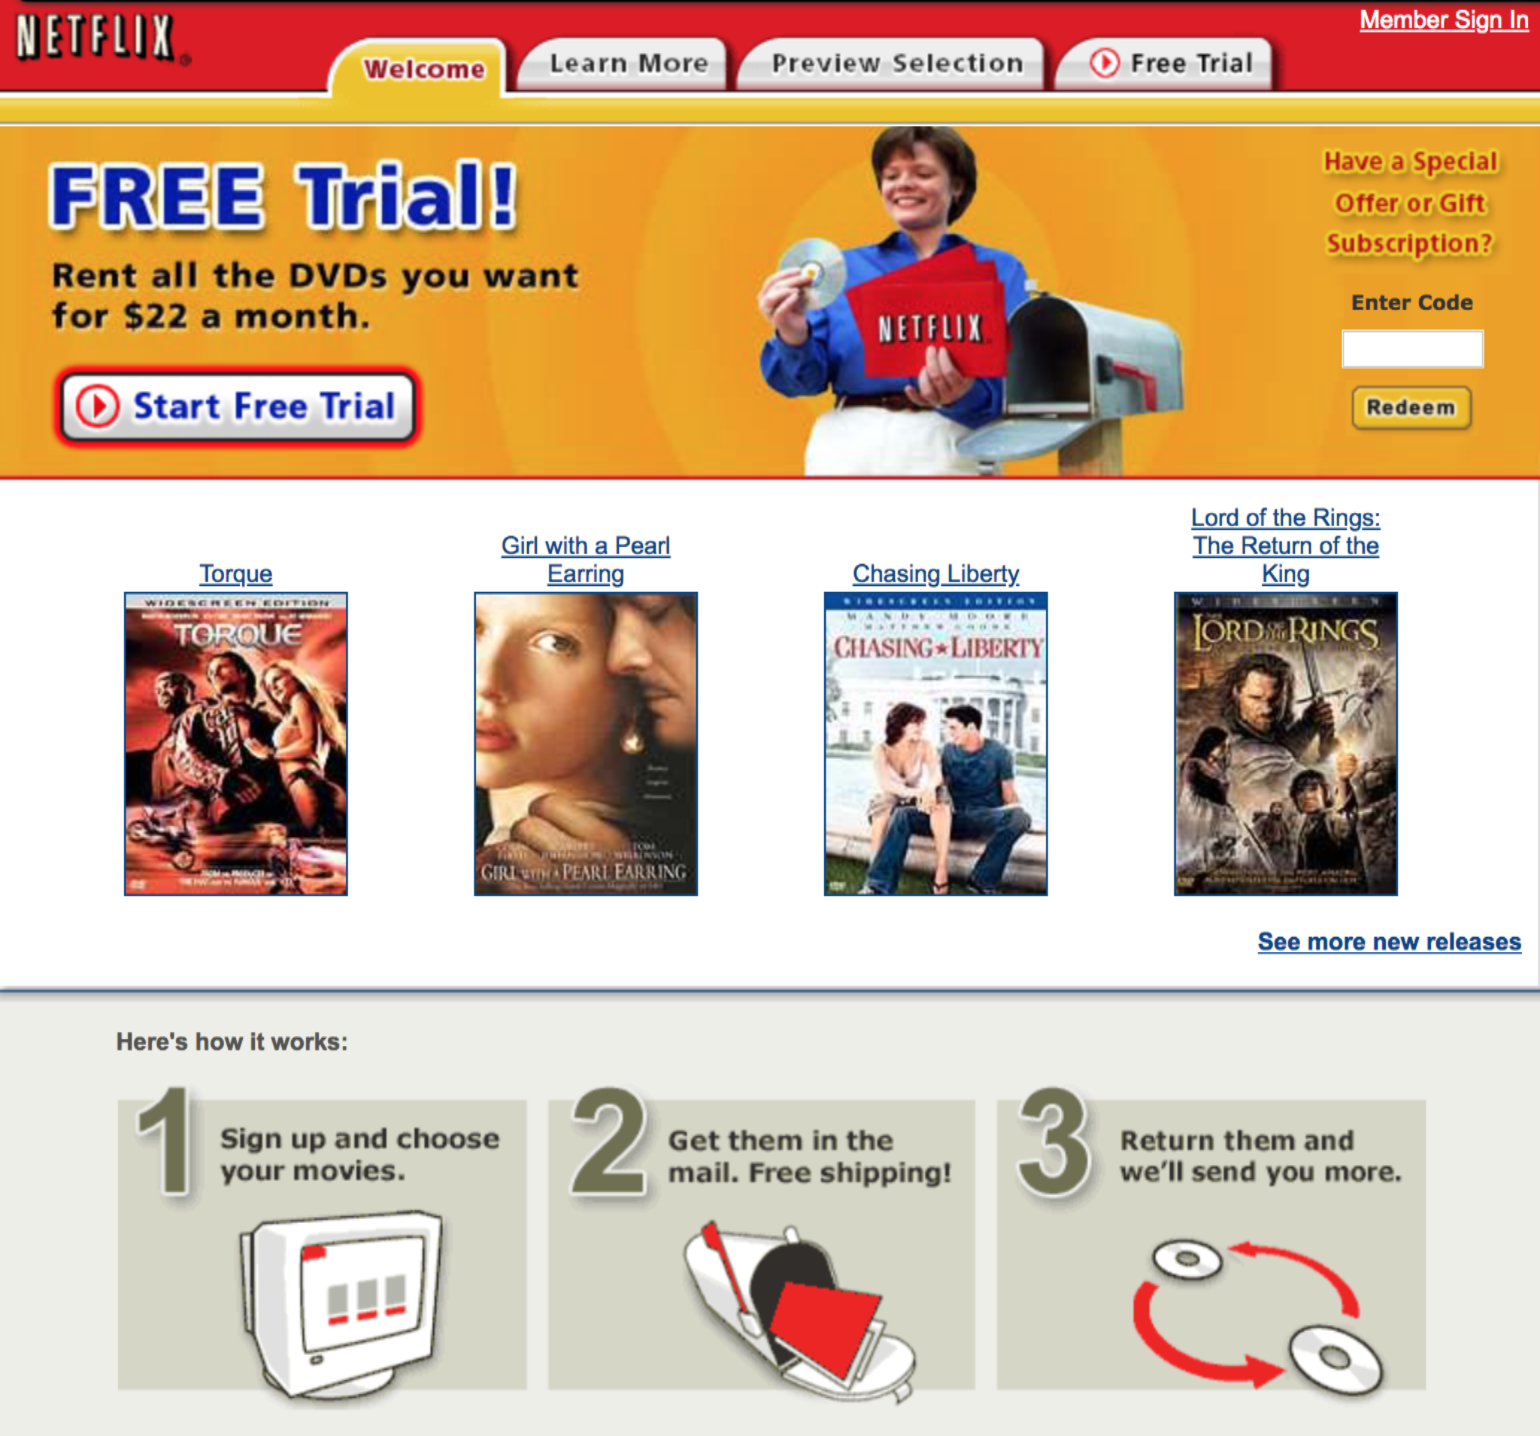

***Back in 1997, Netflix emerged as a DVD-by-mail service, offering rentals at a mere 50 cents each. At that time, the website boasted just about 900 titles. 📼💿🖥️***

***Today, Netflix has transformed into a global entertainment powerhouse, revolutionizing how we consume content. Despite a few bumps in the road, like the Qwikster episode, Netflix remains a symbol of innovation and adaptability, continuously captivating audiences worldwide. The journey is ongoing, and there's more to come. 🌍🚀📺***

> ##  If you enjoyed the kernel, kindly consider giving it an upvote! Your feedback is greatly appreciated. 😊👍